In [20]:
from sklearn.datasets import load_diabetes

In [22]:
X, y = load_diabetes(return_X_y=True)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [23]:
mod = KNeighborsRegressor()

In [24]:
mod.fit(X, y)

KNeighborsRegressor()

In [25]:
mod.predict(X)

array([181.4,  80.8, 150.8, 203.4, 119.4, 108. ,  83.6, 120.6, 127.8,
       187.8, 121.4, 129.6,  98.8, 166.8, 106.6, 144. , 174.4, 177.8,
       132.8, 142. ,  80. ,  73.4, 113.4, 273.8, 151.4, 126.4, 132. ,
       137.8, 107.2, 192.2, 154.6,  65. , 287.8,  78.6,  78.6, 109.6,
       175.2, 172.6, 235. ,  76.4, 158.6, 113.4,  97.6,  74. , 257. ,
        92.8, 163. , 150.2, 110.8, 145.4, 121.2, 152.4, 130.6,  94. ,
       157.2,  88.8, 137.2, 101. , 132.2, 156.6, 115. , 124. ,  65.8,
       132.4, 128.4, 154.4, 119.6,  88.8,  96.2, 136.6,  81.6, 234.6,
       174.4, 109.8, 133.2,  72. , 171.8, 106.6, 179.4, 121.6, 134.4,
       107.8,  69.2, 141.2,  80. , 108.6,  92.8, 124.6,  68.6, 110.6,
        95. , 136.4, 153.4,  82.8,  83.8, 126.8, 170.6, 165.8,  88.6,
       126.2, 158.8,  86.2, 151.8, 155.4, 139.4,  87. , 115. , 143.2,
       181. , 183. ,  71.2,  99.4, 134.8, 202. , 277.4, 165.4, 255.4,
       207. , 126.6, 132.2, 130. , 202. , 232.4, 158.2, 136.4, 166.4,
       111.6,  92.8,

In [26]:
from matplotlib import pylab as plt 
import matplotlib.pylab as plt

In [28]:
mod = KNeighborsRegressor().fit(X, y)

In [29]:
pred = mod.predict(X)

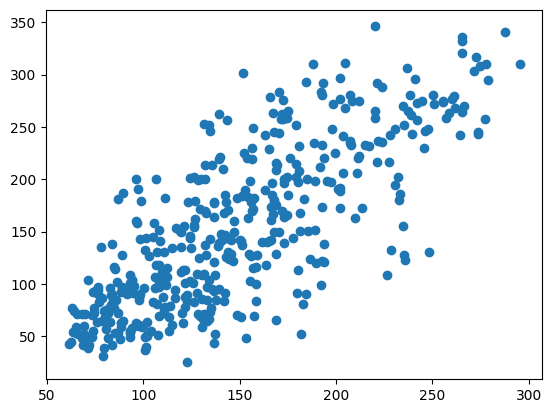

In [30]:
plt.scatter(pred, y)

In [31]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 

In [41]:
mod = KNeighborsRegressor().fit(X, y)
pipe = Pipeline ([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(10))
])

In [42]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=10))])

In [44]:
pred = pipe.predict(X)

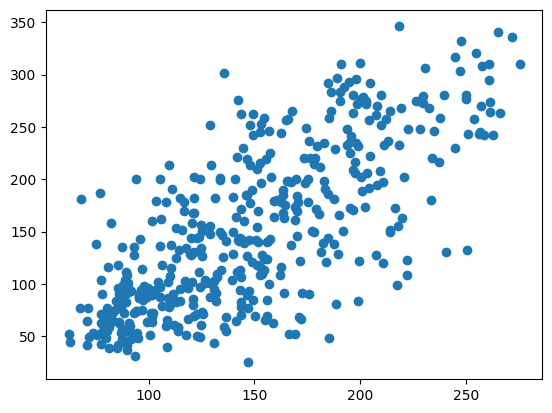

In [45]:
plt.scatter(pred, y)

In [47]:
X, y = load_diabetes(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [66]:
from sklearn.model_selection import GridSearchCV
mod = GridSearchCV(estimator=pipe,
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             cv=3)

In [67]:
mod.fit(X, y);
mod.cv_results_

{'mean_fit_time': array([0.01297164, 0.00056974, 0.00051411, 0.00050799, 0.00082397,
        0.00054534, 0.00055003, 0.00078734, 0.00055369, 0.00057793]),
 'std_fit_time': array([1.72670686e-02, 2.52200831e-05, 1.18944085e-06, 3.64363778e-06,
        3.81976973e-04, 2.68679392e-05, 5.29493258e-05, 1.41195921e-04,
        2.30608275e-06, 2.62830577e-05]),
 'mean_score_time': array([0.00186698, 0.00075658, 0.00077144, 0.00081285, 0.00122611,
        0.00119964, 0.00101789, 0.00100303, 0.00097736, 0.00114544]),
 'std_score_time': array([1.61328742e-03, 2.02176831e-05, 1.07214749e-05, 3.09040104e-05,
        4.34302084e-04, 4.77519514e-04, 2.12872887e-04, 2.92902505e-05,
        5.66324290e-06, 1.40888682e-04]),
 'param_model__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__n_neighbors': 1},


In [70]:
import pandas as pd 
mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005553,0.006839,0.001077,0.000197,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,10
1,0.001051,0.000537,0.001157,0.000237,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,9
2,0.000575,0.000012,0.000864,0.000027,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,8
3,0.001364,0.000510,0.005162,0.003927,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,6
4,0.001507,0.000640,0.001537,0.000092,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,7
5,0.001181,0.000625,0.001292,0.000317,6,{'model__n_neighbors': 6},0.372665,0.389923,0.436389,0.399659,0.026911,5
6,0.000613,0.000029,0.001002,0.000118,7,{'model__n_neighbors': 7},0.412584,0.393681,0.446147,0.417471,0.021696,4
7,0.000537,0.000037,0.000906,0.000019,8,{'model__n_neighbors': 8},0.414478,0.409779,0.485850,0.436702,0.034806,3
8,0.000589,0.000059,0.001012,0.000118,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,2
9,0.000492,0.000014,0.000880,0.000006,10,{'model__n_neighbors': 10},0.408989,0.405303,0.544371,0.452888,0.064706,1
